In [82]:
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
plt.close("all")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression


print(pd.__version__)
print(sys.version)
print(np.version)


2.2.3
3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]
<module 'numpy.version' from 'd:\\uncategorized\\COMP_VISION\\anaconda\\Lib\\site-packages\\numpy\\version.py'>


In [83]:
Data_Needed = pd.read_csv('football_players.csv')
Data_Needed['bd'] = Data_Needed['bd'].astype(int)

In [84]:
Data_Needed.head()

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,0,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,0,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,0,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,0,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,0,tall,1977741


In [85]:
Data_Needed.tail(1000)

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,0,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,0,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,0,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,0,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,0,tall,1977741
...,...,...,...,...,...,...,...,...,...,...,...
995,Ryan Sampson,28,Bundesliga,brazil,170.0,74749.0,decent,gk,0,medium,1697401
996,Tara Ross,38,Ligue 1,france,184.0,103975.0,decent,attacker,0,medium,2349498
997,Kenneth Jones,33,La Liga,brazil,166.0,103267.0,decent,defender,0,short,1540178
998,Scott Kim,27,Bundesliga,brazil,184.0,103987.0,poor,defender,0,tall,1538843


<Axes: >

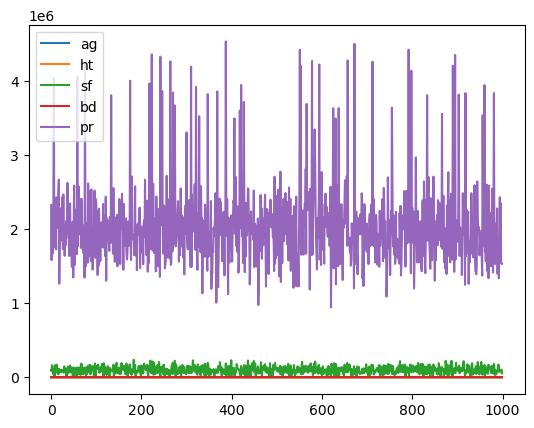

In [86]:
Data_Needed.plot()

In [87]:
Data_Needed.isna().sum()

nm    0
ag    0
lg    0
ct    0
ht    5
sf    6
rt    9
ps    0
bd    0
hr    0
pr    0
dtype: int64

In [88]:
x = Data_Needed.drop(columns= ['nm' , 'pr','hr'])
x


,ag,lg,ct,ht,sf,rt,ps,bd
0,32,Ligue 1,german,172.0,103671.0,amazing,defender,0
1,29,La Liga,german,178.0,83181.0,decent,midfielder,0
2,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,0
3,37,Premier League,german,189.0,154386.0,poor,gk,0
4,28,Bundesliga,german,173.0,122175.0,amazing,gk,0
...,...,...,...,...,...,...,...,...
995,28,Bundesliga,brazil,170.0,74749.0,decent,gk,0
996,38,Ligue 1,france,184.0,103975.0,decent,attacker,0
997,33,La Liga,brazil,166.0,103267.0,decent,defender,0
998,27,Bundesliga,brazil,184.0,103987.0,poor,defender,0


In [89]:
Data_Needed

,nm,ag,lg,ct,ht,sf,rt,ps,bd,hr,pr
0,Paul Blair,32,Ligue 1,german,172.0,103671.0,amazing,defender,0,tall,2324698
1,Susan Murphy,29,La Liga,german,178.0,83181.0,decent,midfielder,0,tall,1581684
2,Eric Malone,33,Bundesliga,brazil,172.0,164118.0,amazing,midfielder,0,tall,2255446
3,Jennifer Hernandez,37,Premier League,german,189.0,154386.0,poor,gk,0,tall,1663689
4,Marcus Campbell,28,Bundesliga,german,173.0,122175.0,amazing,gk,0,tall,1977741
...,...,...,...,...,...,...,...,...,...,...,...
995,Ryan Sampson,28,Bundesliga,brazil,170.0,74749.0,decent,gk,0,medium,1697401
996,Tara Ross,38,Ligue 1,france,184.0,103975.0,decent,attacker,0,medium,2349498
997,Kenneth Jones,33,La Liga,brazil,166.0,103267.0,decent,defender,0,short,1540178
998,Scott Kim,27,Bundesliga,brazil,184.0,103987.0,poor,defender,0,tall,1538843


In [90]:
y = Data_Needed['pr']
y

0      2324698
1      1581684
2      2255446
3      1663689
4      1977741
        ...   
995    1697401
996    2349498
997    1540178
998    1538843
999    1529895
Name: pr, Length: 1000, dtype: int64

In [91]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y, random_state = 11 , test_size= 0.2 )
x_train.dropna()
# drop all nan rows out 
x_train.info()

# i dont know if this section is correct or not ?!? as i wanted to see the nan in the output but i dont ?!?

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 832 to 921
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ag      800 non-null    int64  
 1   lg      800 non-null    object 
 2   ct      800 non-null    object 
 3   ht      795 non-null    float64
 4   sf      795 non-null    float64
 5   rt      793 non-null    object 
 6   ps      800 non-null    object 
 7   bd      800 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 56.2+ KB


In [92]:
x_train.isna().sum()

ag    0
lg    0
ct    0
ht    5
sf    5
rt    7
ps    0
bd    0
dtype: int64

In [93]:
Nan_mean = SimpleImputer(strategy = 'median')
x_train[['sf' , 'ht']] = Nan_mean.fit_transform(x_train[['sf' , 'ht']])
x_test [['sf' , 'ht']]= Nan_mean.transform(x_test[['sf' , 'ht']])
x_train


,ag,lg,ct,ht,sf,rt,ps,bd
832,24,La Liga,france,167.0,137634.0,amazing,attacker,0
797,33,Ligue 1,england,173.0,119901.0,poor,gk,0
49,21,Bundesliga,german,168.0,69498.0,poor,defender,0
867,31,Premier League,other,186.0,95803.0,poor,gk,0
514,27,Ligue 1,france,184.0,127985.0,decent,gk,0
...,...,...,...,...,...,...,...,...
337,28,Serie A,brazil,176.0,110647.0,amazing,attacker,0
91,34,Ligue 1,italy,161.0,155771.0,poor,midfielder,0
80,28,Bundesliga,brazil,167.0,125825.0,amazing,gk,0
703,22,Bundesliga,italy,174.0,26861.0,decent,gk,0


In [94]:
Nan_constant = SimpleImputer(strategy = 'constant' , fill_value='poor')

x_train[['rt']] = Nan_constant.fit_transform(x_train[['rt']])
x_test[['rt']] = Nan_constant.transform(x_test[['rt']])
x_train

,ag,lg,ct,ht,sf,rt,ps,bd
832,24,La Liga,france,167.0,137634.0,amazing,attacker,0
797,33,Ligue 1,england,173.0,119901.0,poor,gk,0
49,21,Bundesliga,german,168.0,69498.0,poor,defender,0
867,31,Premier League,other,186.0,95803.0,poor,gk,0
514,27,Ligue 1,france,184.0,127985.0,decent,gk,0
...,...,...,...,...,...,...,...,...
337,28,Serie A,brazil,176.0,110647.0,amazing,attacker,0
91,34,Ligue 1,italy,161.0,155771.0,poor,midfielder,0
80,28,Bundesliga,brazil,167.0,125825.0,amazing,gk,0
703,22,Bundesliga,italy,174.0,26861.0,decent,gk,0


In [95]:
ohe = OneHotEncoder(handle_unknown ='ignore',sparse_output=False).set_output(transform ='pandas')

# what is handle_unknown here  ???


In [96]:
ohe_transform = ohe.fit_transform(x_train[['lg' , 'ct' , 'ps']])
ohe_transform_test = ohe.transform(x_test[['lg' , 'ct', 'ps']])


In [97]:
x_train = pd.concat([x_train, ohe_transform] , axis=1).drop(columns = ['lg' , 'ct' , 'ps'])
x_test = pd.concat([x_test, ohe_transform_test] , axis=1).drop(columns = ['lg' , 'ct' , 'ps'])


In [98]:
x_train['rt'].unique()


array(['amazing', 'poor', 'decent'], dtype=object)

In [99]:
skills =['poor', 'decent', 'amazing' ]
high = ['short ', 'medium', 'tall']


In [100]:
la_enc = OrdinalEncoder(categories= [skills])


In [101]:
x_train[['rt']] = la_enc.fit_transform(x_train[['rt']])


x_test[['rt']] = la_enc.transform(x_test[['rt']])


In [102]:
lr = LinearRegression()
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 832 to 921
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ag                 800 non-null    int64  
 1   ht                 800 non-null    float64
 2   sf                 800 non-null    float64
 3   rt                 800 non-null    float64
 4   bd                 800 non-null    int64  
 5   lg_Bundesliga      800 non-null    float64
 6   lg_La Liga         800 non-null    float64
 7   lg_Ligue 1         800 non-null    float64
 8   lg_Premier League  800 non-null    float64
 9   lg_Serie A         800 non-null    float64
 10  ct_argentina       800 non-null    float64
 11  ct_brazil          800 non-null    float64
 12  ct_england         800 non-null    float64
 13  ct_france          800 non-null    float64
 14  ct_german          800 non-null    float64
 15  ct_italy           800 non-null    float64
 16  ct_other           800 non-nu

In [103]:
lr.fit(x_train , y_train)

LinearRegression()

In [104]:
lr.score(x_train , y_train)

0.9625451734922947

In [105]:
lr.score(x_test , y_test)

0.9331471519741136

In [106]:
from sklearn.metrics import r2_score

In [107]:
y_pred = lr.predict(x_test)

In [108]:
r2_score(y_test , y_pred)

0.9331471519741136